# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray
from skimage.color import rgba2rgb



def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

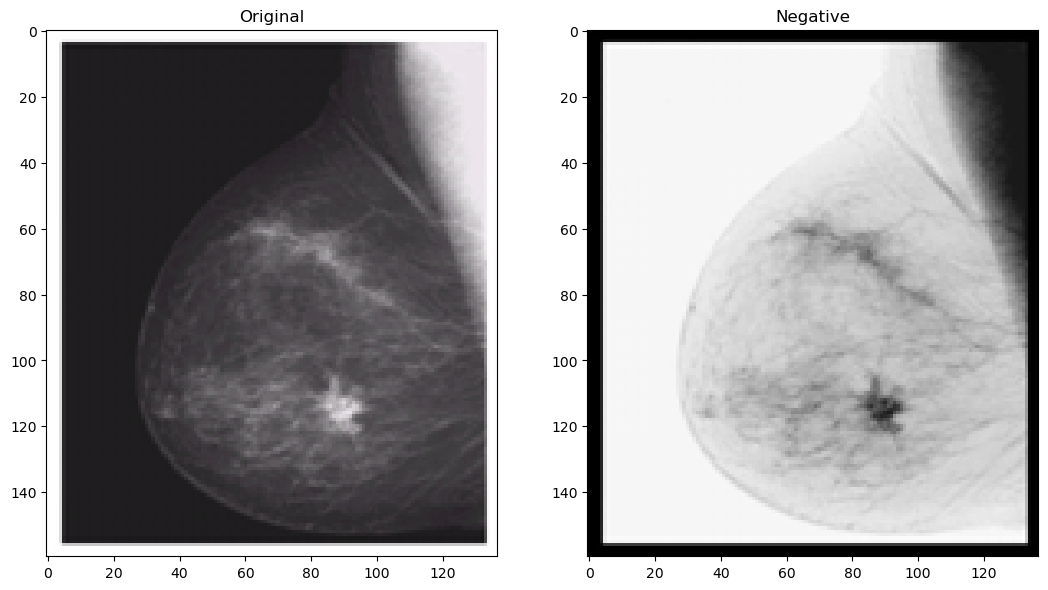

In [4]:
'''
1
Negative Transformation
'''

img = io.imread('imgs/Picture1.png')
# print(img)
# io.imshow(img)
# io.show()

img = rgba2rgb(img)
img_gray = rgb2gray(img)

def negative_transformation(img):
    return 255 - img

img_negative = negative_transformation(img_gray)
show_images([img, img_negative], ['Original', 'Negative'])




[[[254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]
  ...
  [254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]]

 [[254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]
  ...
  [254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]]

 [[254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]
  ...
  [255 255 255 255]
  [254 254 254 255]
  [254 254 254 255]]

 ...

 [[254 254 254 255]
  [254 254 254 255]
  [255 255 255 255]
  ...
  [168 167 168 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]
  ...
  [232 233 232 255]
  [254 254 254 255]
  [254 254 254 255]]

 [[254 254 254 255]
  [254 254 254 255]
  [254 254 254 255]
  ...
  [255 255 255 255]
  [254 254 254 255]
  [254 254 254 255]]]
[[[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843

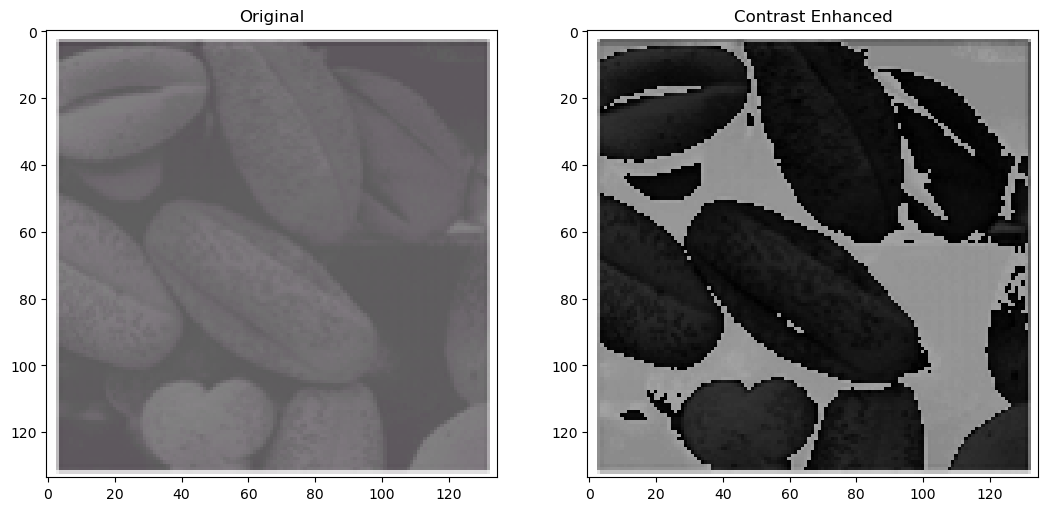

In [5]:
'''
2
Contrast Enhancement
'''
img = io.imread('imgs/Picture2.png')
print(img)
img = rgba2rgb(img)
print (img)
img_gray = rgb2gray(img) *255
# print (img_gray *255)

def contrast_enhancement(img):
    # img = np.where((img >= 0) & (img <= 100), img * (150 / 100) + 50, img)

    # for p in range(img):
    #     if img[p] >= 0 and img[p] <= 100:
    #         img[p] = img[p] * (150 / 100) + 50

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x][y] >= 0 and img[x][y] <= 100:
                img[x][y] = img[x][y] * (150 / 100) + 50


    print (img)


    # if (img >= 0).all() and (img <= 100).all():
    #     img = img * (150 / 100) + 50
    return img

img_contrast = contrast_enhancement(img_gray)
show_images([img, img_contrast], ['Original', 'Contrast Enhanced'])


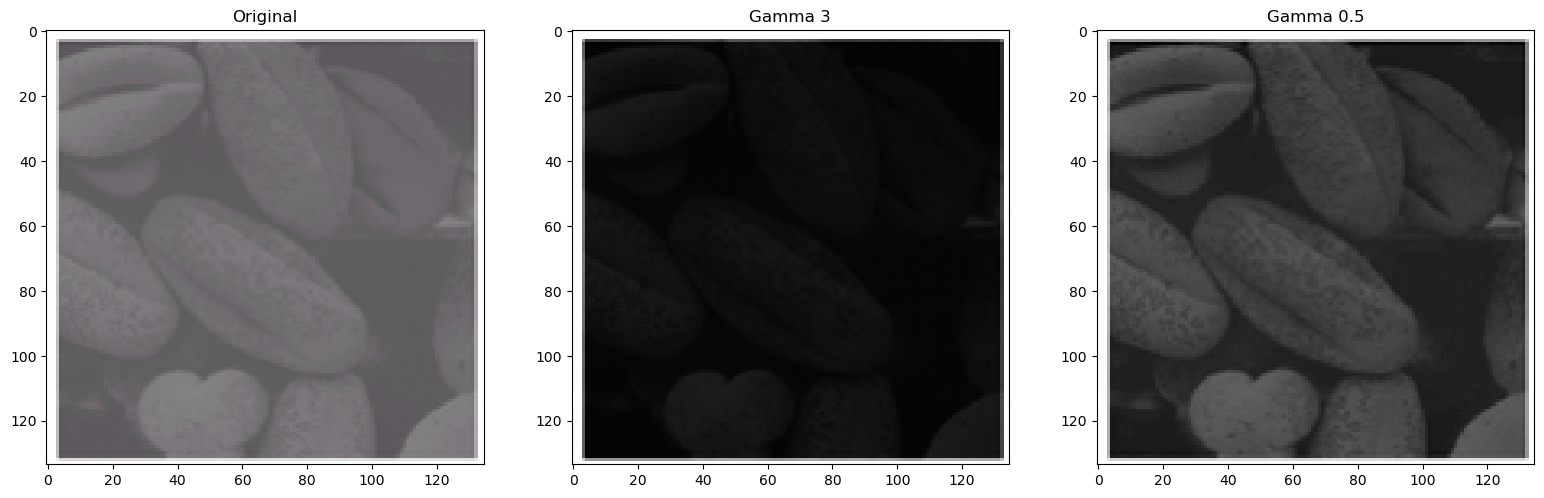

In [6]:
'''
3
Gamma Correction
'''

img = io.imread('imgs/Picture2.png')
img = rgba2rgb(img)
img_gray = rgb2gray(img)

def gamma_correction(img, c , gamma):
    return c * img ** gamma

img_gamma_3 = gamma_correction(img_gray, 1, 3)
img_gamma_0_5 = gamma_correction(img_gray, 1, 0.5)

show_images([img, img_gamma_3, img_gamma_0_5], ['Original', 'Gamma 3', 'Gamma 0.5'])



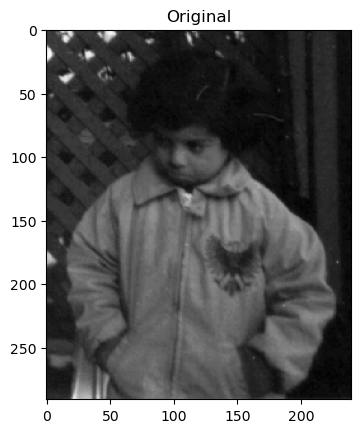

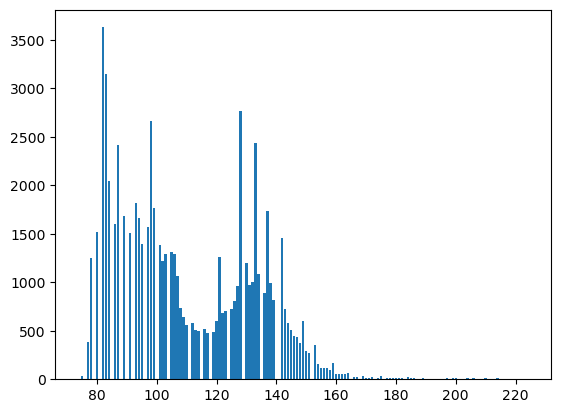

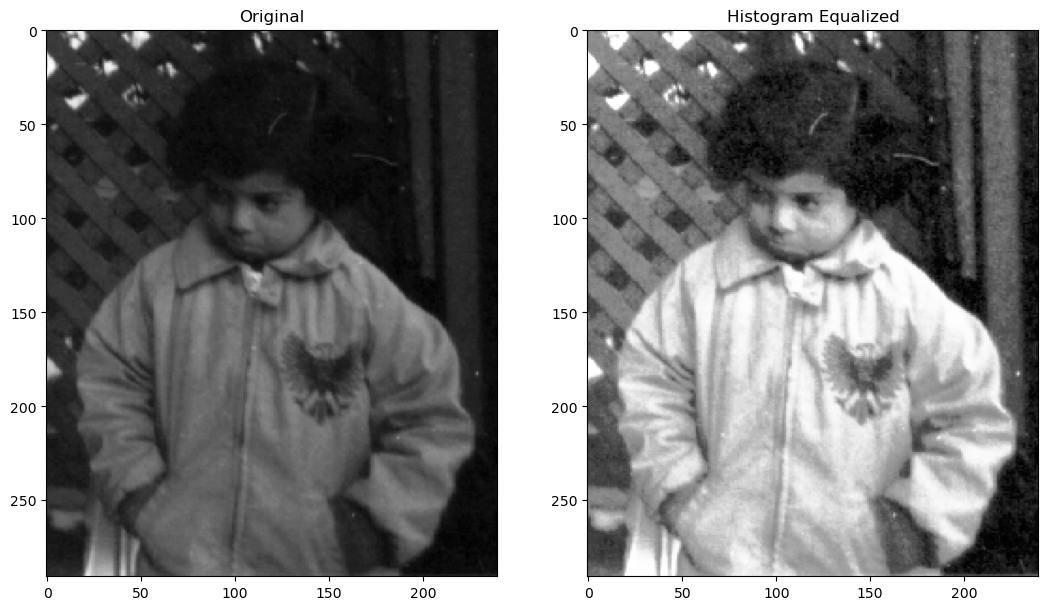

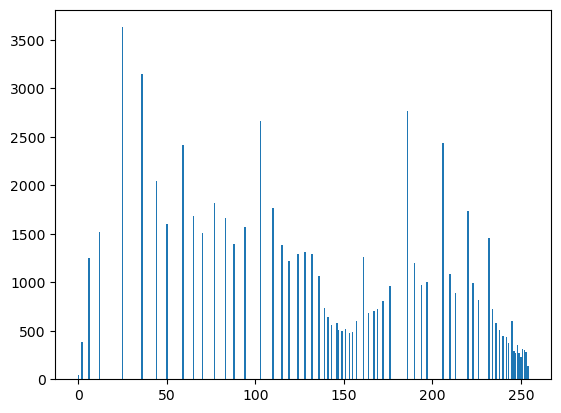

In [7]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

img = io.imread('imgs/pout.tif')
# img = rgba2rgb(img)
# img_gray = rgb2gray(img)

show_images([img], [ 'Original'])
showHist(img)

def histogram_eq(img):
    # a.
    G = 256
    H = np.zeros(G)
    
    # b.  histogram
    for pixel in img.flatten():
        H[int(pixel)] += 1
    
    # c. H_c
    H_c = np.cumsum(H)
    
    # d. Set the mapping between gray-levels
    N, M = img.shape
    T = np.round((G - 1) * H_c / (N * M))
    
    # e. Map the gray-levels in the output image
    img_eq = T[img]
    
    return img_eq

img_eq = histogram_eq(img)
show_images([img, img_eq], ['Original', 'Histogram Equalized'])
showHist(img_eq)

def getImageWithHist(name,ext,nbins=256):
    pass
    


[[193 225 248 ... 255 255 241]
 [243 255 255 ... 255 255 255]
 [255 226 242 ... 149 139 255]
 ...
 [255 178 201 ... 225 196 255]
 [255 164 170 ... 211 202 255]
 [251 240 255 ... 255 255 251]]


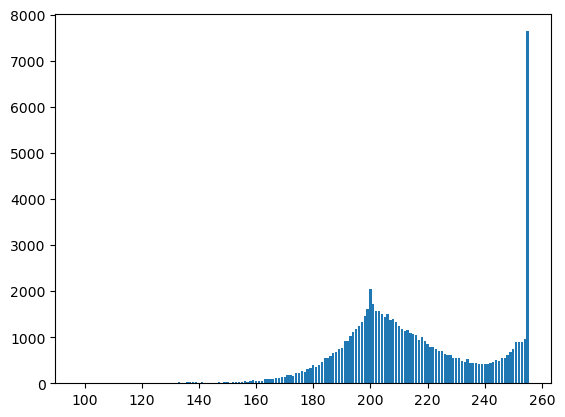

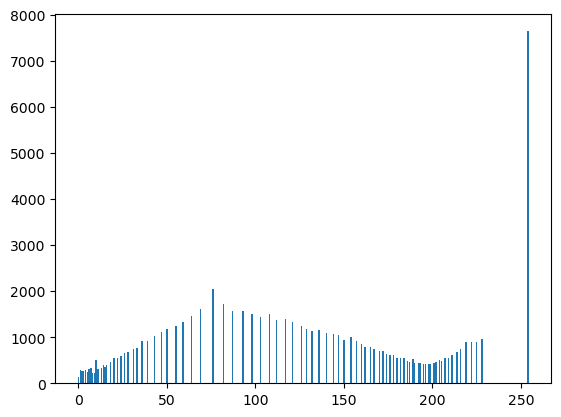

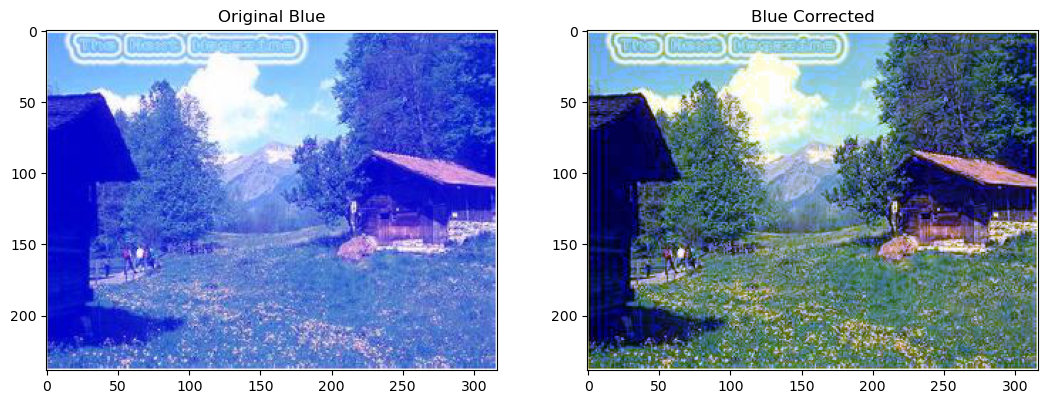

In [ ]:
img_blue = io.imread('2.jpg')

def remove_blue_tint(img):
    # img_gray = (img)
    # showHist(img_gray)
    
    # img_gray = histogram_eq(img_gray)
    # showHist(img_gray)

    img_blue_channel = img[:,:,2]
    print (img_blue_channel)
    img_blue_channel_eq = histogram_eq(img_blue_channel)
    img_blue_corrected = img.copy()
    img_blue_corrected[:,:,2] = img_blue_channel_eq

    return img_blue_corrected
    

    

img_blue_corrected = remove_blue_tint(img_blue)
show_images([img_blue, img_blue_corrected], ['Original Blue', 'Blue Corrected'])